In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/lenovo/Downloads/Employee DataSet 500 instances.csv')

In [3]:
data.shape

(499, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        499 non-null    int64 
 1   id                499 non-null    int64 
 2   groups            499 non-null    object
 3   age               499 non-null    int64 
 4   healthy_eating    499 non-null    int64 
 5   active_lifestyle  499 non-null    int64 
 6   salary            499 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.4+ KB


In [5]:
data.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [7]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
data.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574


In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
data['groups'] = le.fit_transform(data['groups'])

In [16]:
data.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,36,5,5,2297
1,1,0,55,3,5,1134
2,2,0,61,8,1,4969
3,3,3,29,3,6,902
4,4,3,34,6,2,3574


In [19]:
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [20]:
x

,id,groups,age,healthy_eating,active_lifestyle
0,0,0,36,5,5
1,1,0,55,3,5
2,2,0,61,8,1
3,3,3,29,3,6
4,4,3,34,6,2
...,...,...,...,...,...
494,494,1,61,7,4
495,495,2,33,7,7
496,496,0,47,4,2
497,497,0,50,4,7


In [21]:
y

0      2297
1      1134
2      4969
3       902
4      3574
       ... 
494    3691
495    2996
496    2411
497    1252
498    2182
Name: salary, Length: 499, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [24]:
x = ss.transform(x)

In [25]:
x

array([[-1.72858323, -1.12613579, -0.4158972 ,  0.03140162, -0.29463824],
       [-1.72164113, -1.12613579,  0.96716888, -0.97952796, -0.29463824],
       [-1.71469903, -1.12613579,  1.40392659,  1.54779598, -2.20404712],
       ...,
       [ 1.71469903, -1.12613579,  0.38482526, -0.47406317, -1.7266949 ],
       [ 1.72164113, -1.12613579,  0.60320412, -0.47406317,  0.66006619],
       [ 1.72858323, -1.12613579, -0.48869016,  0.53686641,  1.13741841]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
y_pred = reg.predict(x_test)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
def initial_check(model,x_train,y_train):
    rmse_score=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
    r2_score=cross_val_score(model,x_train,y_train,scoring='r2',cv=10)
    print("RMSE (cross_val_score): ",np.sqrt(-rmse_score).mean())
    print("R2 Score (cross_val_score): ",r2_score.mean())

In [34]:
initial_check(reg,x_train,y_train)

RMSE (cross_val_score):  354.92741537935945
R2 Score (cross_val_score):  0.882756194495687


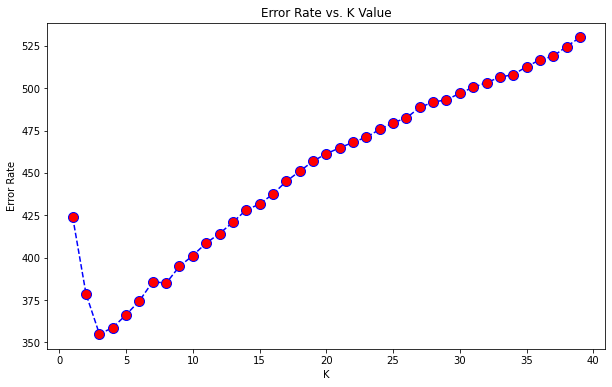

Minimum error:- 354.92741537935945 at K = 3


In [35]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(x_train,y_train)
 rmse_score=cross_val_score(knn,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
 #pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(np.sqrt(-rmse_score).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)